<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/completemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression evaluation matrics
* Mean absolute error:-it calculates the average of how wrong the models prediction are

* Mean square error :- it calculates the square of the average error

* Huber :- it is the cobinaation of mse and  mae

* we use mae for small errors a and mse for large errors


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#Makiing the dataset

In [2]:
x=tf.range(-100,100,4)

y=x+10

# Spliting the dataset
for training and test

In [3]:
x_train=x[:40]
x_test=x[40:]

y_train=y[:40]
y_test=y[40:]


# Building the neural network model

In [4]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=[1], name='Input_layer'),

    tf.keras.layers.Dense(1, name='Output_layer')
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['mae'])

model.fit(x_train,y_train,epochs=1000,verbose=0)

# Plotig the model


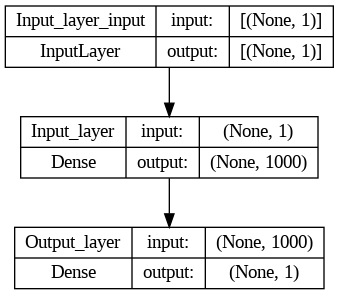

In [5]:
plot_model(model=model,show_shapes=True)

#predictios

In [6]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 77ms/step


#creating a Ploting fuction


In [7]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    # Training data
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Test data
    plt.scatter(test_data, test_labels, c='g', label='Test data')
    # Predictions
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

# CallIng the prediction function

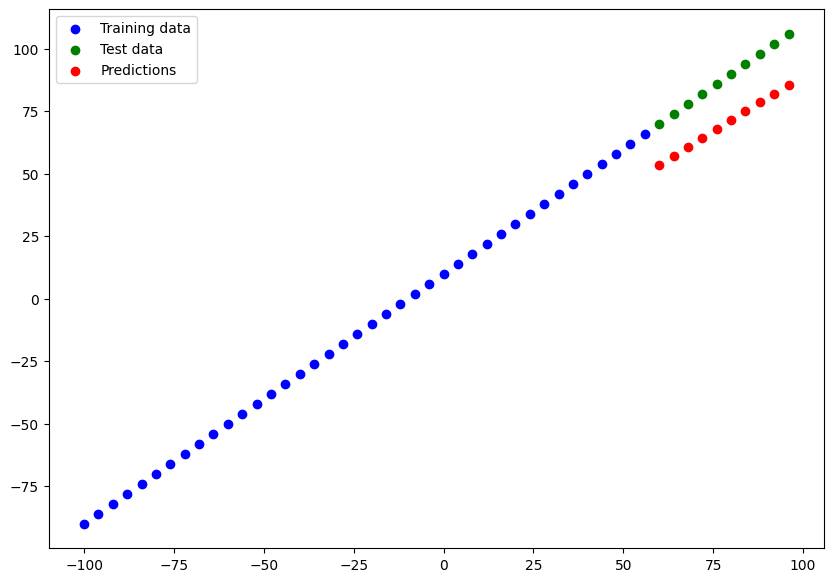

In [8]:
plot_predictions()


# Evaluate


In [9]:
model.evaluate(x_test,y_test)


1/1 [==============================] - 0s 131ms/step - loss: 18.3195 - mae: 18.3195


[18.319549560546875, 18.319549560546875]

# compare the shape of y_pred and y_test before evaluating

IF THEY ARE NOT SAME CHANGE IT

In [10]:
y_pred

array([[53.70559 ],
       [57.255554],
       [60.805527],
       [64.35549 ],
       [67.905464],
       [71.45544 ],
       [75.005394],
       [78.55537 ],
       [82.10532 ],
       [85.65531 ]], dtype=float32)

In [11]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

#calculating the mae

In [12]:
#convert y_pred to tensor and then change the shape
y_pred=tf.constant(y_pred)
y_pred=tf.squeeze(y_pred)
#calculating the mae
mae=tf.keras.losses.MAE(y_test,y_pred)
print('mean absolute error is ',mae)

mean absolute error is  tf.Tensor(18.319553, shape=(), dtype=float32)


# calculating the MSE

In [13]:
mse=tf.keras.losses.MSE(y_test,y_pred)
print('mean square error is ', mse)

mean square error is  tf.Tensor(337.27692, shape=(), dtype=float32)


# Improving the model with more expirmets

* Get more data

* Create more Hidden layers

* Train on more epochs

In [14]:
# rebuilding the model

newmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='inputlayer'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name='output')
])


newmodel.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['mae'])

newmodel.fit(x_test,y_test,epochs=1000,verbose=0)

# Doing prediction with the new model



In [15]:
y_pred2=newmodel.predict(x_test)


1/1 [==============================] - 0s 105ms/step


#Ploting the new model

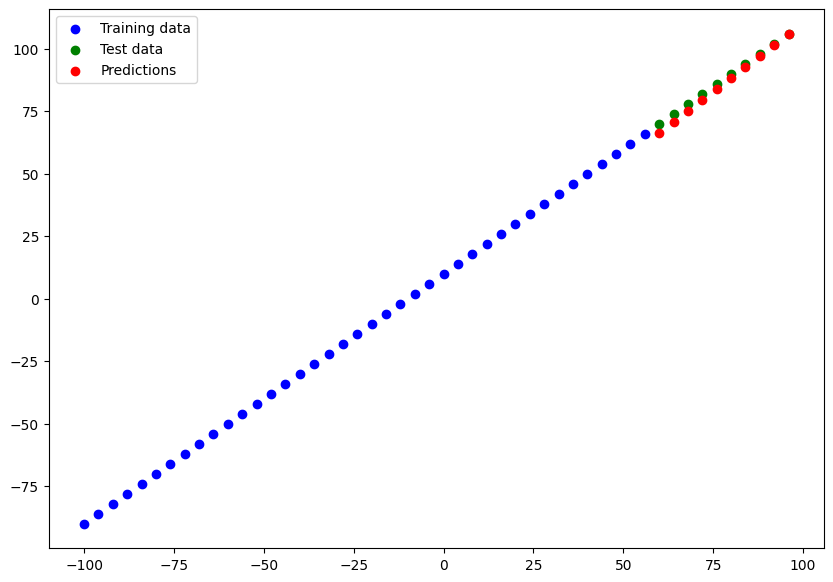

In [19]:
plot_predictions(predictions=y_pred2) # only change predictuion others are same

# Calculating new mse and mae

In [21]:
y_pred2=tf.constant(y_pred2)# converting to tensor
y_pred2=tf.squeeze(y_pred2)# change the shape

new_mae=tf.keras.losses.MAE(y_test,y_pred2)
print('MAE for improved model is ', new_mae)

print()
print()

new_mse=tf.keras.losses.MSE(y_test,y_pred2)
print('MSE for improved model is ', new_mse)



MAE for improved model is  tf.Tensor(1.897165, shape=(), dtype=float32)


MSE for improved model is  tf.Tensor(5.019354, shape=(), dtype=float32)


# comparing the models


In [22]:
import pandas as pd
model_results=[[model,mae.numpy(),mse.numpy()],
              [newmodel,new_mae.numpy(),new_mse.numpy()]
]

all_results=pd.DataFrame(model_results,columns=['models','mae','mse'])

all_results

,models,mae,mse
0,<keras.src.engine.sequential.Sequential object...,18.319553,337.276917
1,<keras.src.engine.sequential.Sequential object...,1.897165,5.019354


In [23]:
newmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Dense)          (None, 100)               200       
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Saving the model
models can be saved in two formats

* Saved model format :->when we want to use the model insidde tensor flow


* HDF5 Format ;-> when we want to use the model outside tesnorflow and for big models

In [26]:
# saving in save modelformat
newmodel.save('first model')

# saving in hdf5 format

newmodel.save('first model in hdf5 format.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# loading the model

we use tf.keras.models.load_models('model name')

In [29]:
first_model=tf.keras.models.load_model('/content/first model in hdf5 format.h5')

#checking if its the same model
first_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Dense)          (None, 100)               200       
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Comparing the results to check if they are same

In [31]:
#comparing the model
old=newmodel.predict(x_test)
new=first_model.predict(x_test)

old == new

1/1 [==============================] - 0s 64ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])